## Logistic Regression 구현

In [1]:
import math # 이정도는 ㄱㅊ
import pandas as pd

In [2]:
data = pd.read_csv('assignment_2.csv')

In [3]:
data # Label: 유료 계정 등록 여부

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000
5,0,1,6.5,69000
6,0,1,7.5,76000
7,0,1,8.1,88000
8,1,1,8.7,83000
9,1,1,10.0,83000


### 0. Gradient Descent

In [4]:
def step(v, direction, step_size):
    """
    한 지점에서 step size만큼 이동하는 step 함수를 구현하세요.
    필요한 인자는 3가지입니다.
    """
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

# V지점에서 + 방향 direction으로 * step size 만큼 이동.

In [5]:
def safe(f) :
    """
    f에 대한 예외처리를 위한 함수(f가 infinite일 때)
    """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [6]:
def minimize_bgd(target_fn, gradient_fn, theta_0, tolerance = 0.00001): # bgd: batch gradient descent
    """
    목적함수를 최소화시키는 theta를 경사 하강법을 사용해서 찾는다.
    
    target_fn : 목적함수 
    """
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    # 시작점 설정
    theta = theta_0
    target_fn = safe(target_fn) # 오류를 처리할 수 있는 target_fn으로 변환
    value = target_fn(theta) # 최소화시키려는 값
    
    while True:
        gradient = gradient_fn(theta) # gradient값 계산
        next_thetas = [step(theta, gradient, -step_size)  # theta 에서 gradient 방향으로 stepsize 만큼 이동
                       for step_size in step_sizes]  #### update thetas --> 각 step sizes에 따른 theta값을 list형태로 리턴
        
        # 함수를 최소화시키는 theta 선택
        obj = next_thetas 
        key = target_fn
        next_theta = min(obj, key = key)  # 더 작아지는 방향으로 내려가야 하니까. 새로운 최소값을 찾으면,
        next_value = target_fn(next_theta) # 이 값을 저장.
        
        # tolerance만큼 수렴하면 멈춤
        temp = abs(value - next_value) #최소화 시키려는 값과 현재의 value의 차이를 본다. 
        if temp < tolerance:
            return theta
        else: #수렴하지 않는경우, 어떻게 업데이트 시킬지 채워넣으세요
            theta, value = next_theta, next_value        

### 1. 로지스틱 함수
해당 함수는 1/(1+exp[-(ax+b)]로 표현되었음을 기억합시다.

In [8]:
def logistic(x):
    return 1.0 / (1 + math.exp(-x))

In [9]:
logistic(2)

0.8807970779778823

### 2. Likelihood 구현
그냥 Likelihood function 대신, log likelihood function을 이용해서 구현하세요.

In [10]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [11]:
def logistic_log_likelihood_i(x_i, y_i, beta): # 개별 데이터포인트에 대한 likelihood 값
    """
    해당 함수에 대한 설명을 작성하고,
    리턴문을 채우세요.
    """
    #y_i 의 레이블이 1이면,
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    # y_i의 레이블이 0이면, 
    else:
        return math.log(1 - logistic(dot(x_i, beta)))

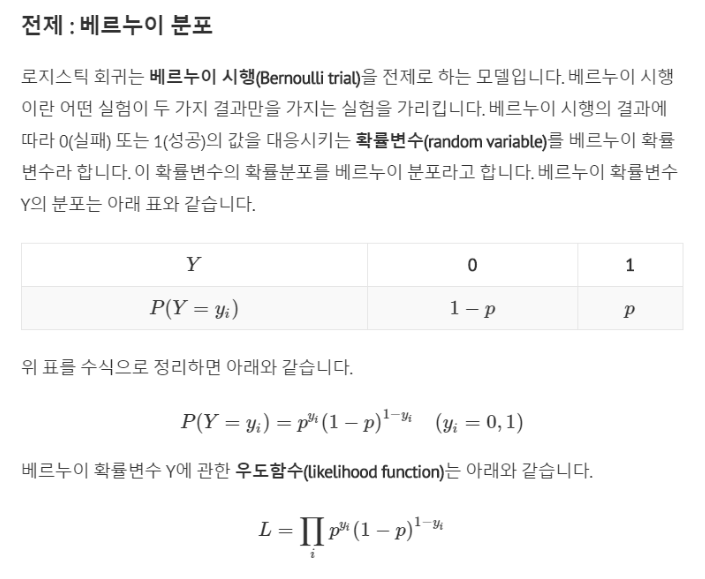

In [12]:
def logistic_log_likelihood(): # 전체 데이터에 대한 likelihood
    """
    함수의 인자를 채워넣고,
    zip 함수를 이용하여 return 문을 완성하세요.
    """
    return sum(logistic_log_likelihood_i(x_i, y_i, beta)
               for x_i, y_i in zip(x, y))

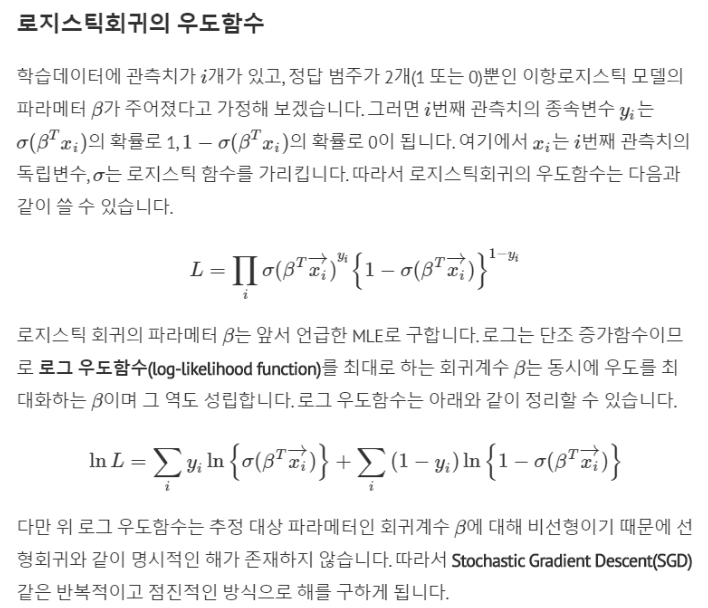

### 3. Gradient for Log Reg
아래 3가지 함수에 대해 해당 함수의 인자와 기능을 자세히 설명하세요.

In [14]:
def logistic_log_partial_ij(x_i, y_i, beta, j):
    """
    특정 데이터 x_i에 대한 beta_j의 gradient 값 --> 상수 형태의 리턴값
    """
    return (y_i - logistic(dot(x_i, beta))) * x_i[j] # j: beta의 index

def logistic_log_gradient_i(x_i, y_i, beta):
    """
    x_i(row)에 대한 beta의 gradient 값(column 개수만큼) --> 리스트 형태의 리턴값을 가짐
    """
    return [logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]

def logistic_log_gradient(x, y, beta):
    """
    전체 데이터에 대한 beta의 gradient 값 
    --> 이중 리스트를 vector_add 시켜서 beta_j에 대한 gradient값들을 rowSum 해놓은 리스트를 리턴
    """
    return reduce(vector_add, [logistic_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x,y)])
# reduce ~ == np.sum(iter, axis = 0)

1) 참고 (logistic_log_partial_ij)  
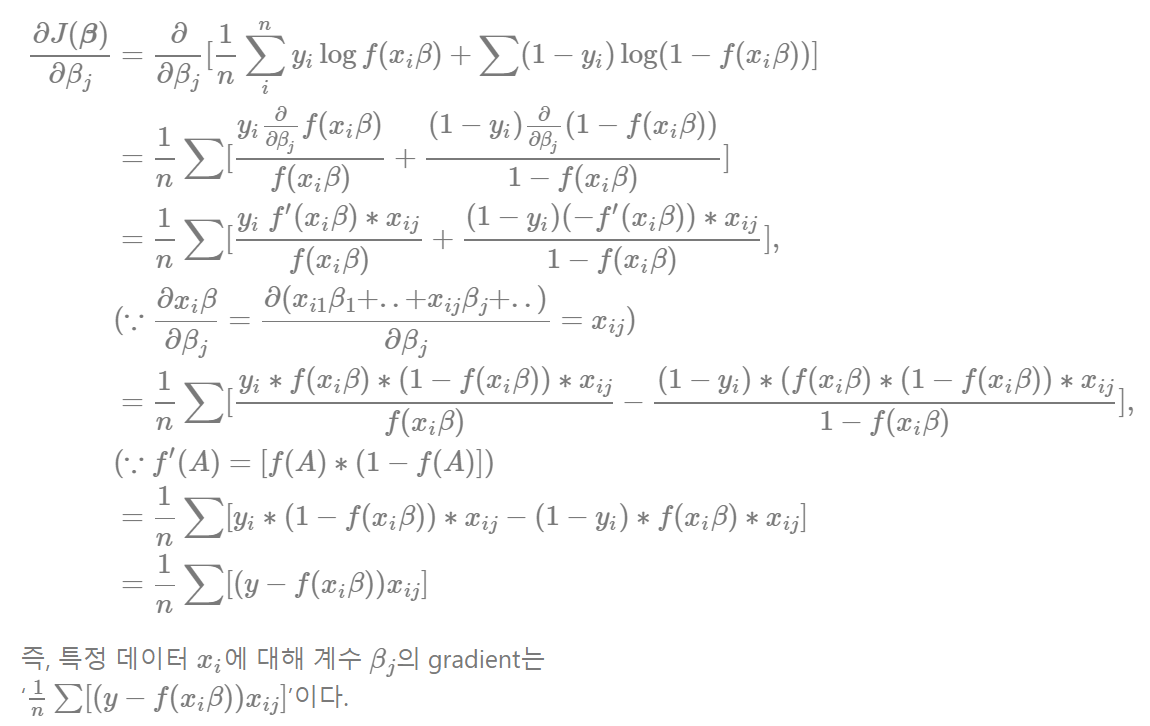

### 4. Model Fitting
위에서 구현한 목적함수와 Gradient Descent Algorithm을 이용하여 Model을 Fitting 시켜보세요.  

In [15]:
data


,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000
...,...,...,...,...
195,0,1,6.5,84000
196,0,1,6.9,73000
197,0,1,5.1,72000
198,1,1,9.1,69000


In [16]:
X = data.drop('Label', axis = 1)
y = data['Label']


In [17]:
X=X.as_matrix() # matrix로 변환해주어야 합니다!
y=y.as_matrix()


C:\Users\daeba\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\daeba\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
X[:10] ## X: 데이터 스케일이 필요함.


array([[1.0e+00, 7.0e-01, 4.8e+04],
       [1.0e+00, 1.9e+00, 4.8e+04],
       [1.0e+00, 2.5e+00, 6.0e+04],
       [1.0e+00, 4.2e+00, 6.3e+04],
       [1.0e+00, 6.0e+00, 7.6e+04],
       [1.0e+00, 6.5e+00, 6.9e+04],
       [1.0e+00, 7.5e+00, 7.6e+04],
       [1.0e+00, 8.1e+00, 8.8e+04],
       [1.0e+00, 8.7e+00, 8.3e+04],
       [1.0e+00, 1.0e+01, 8.3e+04]])

In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
ss = StandardScaler()
X_scaled = ss.fit_transform(data.drop(['Label'], axis = 1)) # X_scaled


In [21]:
for i,_ in enumerate(X_scaled):
    X_scaled[i][0] = 1 # bias term 추가
    

In [22]:
random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y)


##### Partial 함수
http://www.incodom.kr/%ED%8C%8C%EC%9D%B4%EC%8D%AC/%ED%95%A8%EC%88%98  
--> partial 함수 설명입니다!(혹시 생소하신 분들을 위해..!)  
여기에서는 x_train과 y_train 인자를 포함시켜서 fn, gradient_fn을 기존 구현해놓은 목적함수, 그래디언트 함수를 활용해서(재활용하여) 만들도록 partial함수를 사용합니다.  
(gradient descent 함수가 x,y를 포함 시킨 함수임을 가정하고 구현된 함수이기 때문)

In [23]:
# 아래에 Model Fitting 진행
# partial을 이용해 fn과 gradient_fn 구현

fn = partial(logistic_log_likelihood, x_train, y_train)
gradient_fn = partial(logistic_log_gradient, x_train, y_train)

beta_0 = [random.random() for _ in range(3)] # 임의의 시작점
#beta_0 = [1,1,1]

# 경사 하강법으로 최적화
beta_hat = minimize_bgd(neg(fn), neg_all(gradient_fn), beta_0)


In [24]:
beta_hat


[-2.3632744821600635, 4.982248330800093, -4.975294631267929]

### SGD로 계수 추정

In [ ]:
fn_sgd = neg(logistic_log_likelihood_i)
gradient_fn_sgd = neg_all(logistic_log_gradient_i)
beta_sgd_0 = [random.random() for _ in range(3)]

beta_hat_sgd = minimize_sgd(fn_sgd,gradient_fn_sgd, x_train, y_train, beta_sgd_0)

In [26]:
beta_hat_sgd


[-0.11639980404756523, 0.4454301501915983, 0.0616993388112555]

### Valid한 결과인지 check 
Accuracy를 찍어보겠습니다.

In [27]:
def calc_accuracy(x_test, y_test, theta, threshold = 0.5):
    true_positives = false_positives = true_negatives = false_negatives = 0

    # threshold: 0.5
    for x_i, y_i in zip(x_test, y_test):# x_i: i번째 row, y_i: i번째 label
        predict = logistic(dot(x_i, theta))

        if y_i == 1 and predict >= threshold: # y_i == 1 & pred >= .5: 실제값 1 and 예측 1 (TP)
            true_positives += 1
        elif y_i == 1: # y_i == 1 & pred < .5: 실제값 1 but 예측 0 (FN)
            false_negatives += 1
        elif predict >= 0.5: # y_i == 0 & pred >= 0.5: 실제값 0 but 예측 1 (FP)
            false_positives += 1
        else: # y_i == 0 & pred < 0.5: 실제값 0 and 예측 0 (TN)
            true_negatives += 1

    accuracy = (true_positives + true_negatives) / (true_positives+false_negatives+false_positives+true_negatives)
    return accuracy

accuracy = calc_accuracy(x_test, y_test, beta_hat)
accuracy_sgd = calc_accuracy(x_test, y_test, beta_hat_sgd)
print("accuracy for batch gradient descent: {}".format(accuracy))
print("accuracy for stochastic gradient descent: {}".format(accuracy_sgd))

accuracy for batch gradient descent: 0.86
accuracy for stochastic gradient descent: 0.58
